## **Оглавление**:
- [Шаг 1. Откроем файл с данными и изучим общую информацию](#id-section1)<div id='id-section2'/>
- [Вывод](#id-section3)<div id='id-section4'/>


- [Шаг 2. Предобработка данных](#id-section5)<div id='id-section6'/>
- [Обработка пропусков](#id-section7)<div id='id-section8'/>
- [Вывод](#id-section9)<div id='id-section10'/>
- [Замена типа данных](#id-section11)<div id='id-section12'/>
- [Вывод](#id-section13)<div id='id-section14'/>
- [Обработка дубликатов](#id-section15)<div id='id-section16'/>
- [Вывод](#id-section17)<div id='id-section18'/>
- [Лемматизация](#id-section19)<div id='id-section20'/>
- [Вывод](#id-section21)<div id='id-section22'/>
- [Категоризация данных](#id-section23)<div id='id-section24'/>
- [Вывод](#id-section25)<div id='id-section26'/>
- [Работа с артефактами](#id-section27)<div id='id-section28'/>
- [Вывод](#id-section29)<div id='id-section30'/>


- [Шаг 3. Проанализируем данные о клиентах](#id-section31)<div id='id-section32'/>
- [Изучим, есть ли зависимость между наличием детей и возвратом кредита в срок](#id-section33)<div id='id-section34'/>
- [Вывод](#id-section35)<div id='id-section36'/>
- [Изучим, есть ли зависимость между семейным положением и возвратом кредита в срок](#id-section37)<div id='id-section38'/>
- [Вывод](#id-section39)<div id='id-section40'/>
- [Изучим, есть ли зависимость между уровнем дохода и возвратом кредита в срок](#id-section41)<div id='id-section42'/>
- [Вывод](#id-section43)<div id='id-section44'/>
- [Узнаем, как разные цели кредита влияют на его возврат в срок](#id-section45)<div id='id-section46'/>
- [Вывод](#id-section47)<div id='id-section48'/>


- [Шаг 4. Общий вывод](#id-section49)<div id='id-section50'/>


<div id='id-section1'/>

## [Шаг 1. Откроем файл с данными и изучим общую информацию](#id-section2)

Чтобы не выводить на экран большую таблицу `data` целиком, применим методы `head()` и `tail()` и выведем только часть данных - первые и последние 5 строк.

In [1]:
from IPython.display import display

import pandas as pd
from pymystem3 import Mystem
m = Mystem()
from collections import Counter

data = pd.read_csv('data.csv')
display(data.head())
display(data.tail())

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля
21524,2,-1984.507589,40,среднее,1,женат / замужем,0,F,сотрудник,0,82047.418899,на покупку автомобиля


Посмотрим, какие типы данных хранятся в каждом столбце таблицы `data`, воспользуемся методом `info()`.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


<div id='id-section3'/>

### [Вывод](#id-section4)

Наша таблица `data` - это объемный массив данных, в нем хранится более 21 тыс. строк. 

В столбцах присутствуют типы данных `int64` и `float64` (для количественных переменных, например: количество детей у заемщика, количество дней трудового стажа, возраст, для логической переменной: задолженность по кредиту, для категориальных переменных-идентификаторов), а также `object` (для категориальных переменных, например: уровень образования, семейное положение, пол, тип занятости, цель получения кредита).  

В столбце `days_employed` полно данных с отрицательными значениями (артефактов), это обязательно надо будет обработать.

<div id='id-section5'/>

## [Шаг 2. Предобработка данных](#id-section6)

<div id='id-section7'/>

### [Обработка пропусков](#id-section8)

Найдем пропущенные значения по каждому столбцу в таблице `data`, для этого используем метод `isnull().sum()`. 

In [3]:
display(data.isnull().sum())

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Итак, в нашей таблице `data` нашлись пропуски в столбцах, в которых собраны количественные переменные (столбцы про трудовой стаж `days_employed` (значения исчисляются в днях) и ежемесячный доход `total_income` (значения исчисляются в рублях). 

Считаем, что возникновение одинакового количества пропусков в этих двух столбцах объясняется вполне логичной и закономерной причиной - ведь человек, заполняющий форму-анкету, явно указывает, что он не работает (оставляет графу про трудовой стаж пустой), а значит, не имеет дохода (также оставляет эту графу пустой). 

Заполним найденные пропуски в столбцах `days_employed` и `total_income` нулевыми значениями методом `fillna` с аргументом `value=0`. 

Мы полагаем, что медианное значение для заполнения пропусков брать некорректно, так как клиенты без трудового стажа и ежемесячного дохода - это самостоятельная социальная категория, и если мы заполним пропуски чем-то еще, кроме нулей, мы тем самым уничтожим в базе данных `data` целую социальную категорию клиентов. Это плохо отразится на репрезентативности.

In [4]:
data['days_employed'] = data['days_employed'].fillna(value=0)
data['total_income'] = data['total_income'].fillna(value=0)

Проверим, что пропущенных значений больше нет, снова вызываем метод `isnull().sum()`.

In [5]:
display(data.isnull().sum())

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

<div id='id-section9'/>

### [Вывод](#id-section10)

Мы нашли в таблице `data` пропуски в двух столбцах `days_employed` и `total_income`, заполнили пропуски нулевыми значениями и проверили, что пропущенных значений не осталось.

<div id='id-section11'/>

### [Замена типа данных](#id-section12)

Заменим вещественный тип данных на целочисленный. Для удобства снова вызовем метод `info()` и посмотрим, какие типы данных есть в каждом столбце таблицы `data`.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Нас интересует вещественный тип данных - `float64` - в столбцах про трудовой стаж `days_employed` и ежемесячный доход `total_income`. Надо заменить этот тип данных на `int64`, так как это означает целое число.


Используем метод для изменения типа данных `astype()` с аргументом `int64`.

In [7]:
data['days_employed'] = data['days_employed'].astype('int64')
data['total_income'] = data['total_income'].astype('int64')

Методом `info()` проверяем, произошла ли замена.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null int64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null int64
purpose             21525 non-null object
dtypes: int64(7), object(5)
memory usage: 2.0+ MB


<div id='id-section13'/>

### [Вывод](#id-section14)

Мы заменили вещественный тип данных на целочисленный в двух столбцах `days_employed` и `total_income` и проверили, что замена произошла.

<div id='id-section15'/>

### [Обработка дубликатов](#id-section16)

Найдем дубликаты в данных методом `duplicated().sum()`, что позволит нам посчитать общее количество дубликатов в таблице `data`.

In [9]:
display(data.duplicated().sum())

54

Дубликатов нашлось 54 шт. 

Возможные факторы их появления - технические либо человеческие, когда форма-анкета "зависала", и клиенты или сотрудники банка заполняли ее еще раз, при этом ранее введенная ими информация сохранялась.

Удалим дубликаты методом `drop_duplicates().reset_index` с аргументом `drop=True`. Это позволит нам получить таблицу, очищенную от дубликатов, с новой индексацией.

In [10]:
data = data.drop_duplicates().reset_index(drop=True)

Проверим, что все дубликаты удалились, опять вызовем метод `duplicated().sum()`.

In [11]:
display(data.duplicated().sum())

0

<div id='id-section17'/>

### [Вывод](#id-section18)

Мы нашли 54 дубликата, удалили их и получили таблицу `data`, очищенную от дубликатов, с новой индексацией, а также проконтролировали наши действия проверкой.

<div id='id-section19'/>

### [Лемматизация](#id-section20)

Для анализа данных, содержащихся в столбце с целями получения кредита `purpose`, нам необходимо выделить категории (главные слова-индикаторы), которые коротко опишут, для чего каждый клиент взял кредит.

Отберем все уникальные значения столбца `purpose` и "склеим" их в одну огромную строку.

In [13]:
long_string = ' '.join(data['purpose'].unique())

Пролемматизируем эту строку методом `m.lemmatize` и сохраним результат в переменной `lemmas`.

In [14]:
lemmas = m.lemmatize(long_string)

Методом `Counter` посчитаем, сколько лемм нашлось, посмотрим на них и определим для себя самые главные - то есть будущие категории целей кредита.

In [15]:
count = Counter(lemmas)
display(count)

Counter({'покупка': 10,
         ' ': 96,
         'жилье': 7,
         'приобретение': 1,
         'автомобиль': 9,
         'дополнительный': 2,
         'образование': 9,
         'сыграть': 1,
         'свадьба': 3,
         'операция': 4,
         'с': 5,
         'на': 4,
         'проведение': 1,
         'для': 2,
         'семья': 1,
         'недвижимость': 10,
         'коммерческий': 2,
         'жилой': 2,
         'строительство': 3,
         'собственный': 1,
         'подержать': 2,
         'свой': 4,
         'со': 1,
         'заниматься': 2,
         'сделка': 2,
         'получение': 3,
         'высокий': 3,
         'профильный': 1,
         'сдача': 1,
         'ремонт': 1,
         '\n': 1})

Мы выбрали такие категории целей кредита: 
- недвижимость,
- автомобиль, 
- образование, 
- операция,
- свадьба,
- другое (на случай, если мы что-то важное не учли).

Но отдельно отметим слово *жилье* - это тоже попадает в категорию *недвижимость*.

<div id='id-section21'/>

### [Вывод](#id-section22)

С помощью лемматизации уникальных значений из столбца `purpose` нам удалось выделить основные категории (главные слова-индикаторы), которые коротко описывают, для чего каждый клиент взял кредит.

<div id='id-section23'/>

### [Категоризация данных](#id-section24)

Проводить лемматизацию и последующую категоризацию целей кредита на нашей большой таблице `data` будет проблематично, ведь в ней более 21 тыс. строк, и на эти процессы уйдут годы...

Поэтому для экономии наших лет жизни мы соберем маленькую табличку-словарик `dict_category`, в которой первый столбец `purpose` будет взят из `data` - там будут все уникальные строки с целями кредита.

In [16]:
a = data['purpose'].unique()
b = ['purpose']
dict_category = pd.DataFrame(data = a, columns = b)

Добавим к словарику второй столбец с леммами от первого столбца (для этого применим к столбцу `purpose` функцию `apply` с аргументом `m.lemmatize`) и посмотрим, что получилось. 

Выведем первые 5 строк.

In [17]:
dict_category['lemmas'] = dict_category['purpose'].apply(m.lemmatize)
display(dict_category.head())

,purpose,lemmas
0,покупка жилья,"[покупка, , жилье, \n]"
1,приобретение автомобиля,"[приобретение, , автомобиль, \n]"
2,дополнительное образование,"[дополнительный, , образование, \n]"
3,сыграть свадьбу,"[сыграть, , свадьба, \n]"
4,операции с жильем,"[операция, , с, , жилье, \n]"


Теперь напишем функцию, которая будет перебирать в словарике значения в стобце с леммами `lemmas`, а возвращать названия категорий (их мы получили раньше на этапе метода `Count`).

Вспоминаем про слово *жилье*, которое должно попасть в категорию *недвижимость*.

In [18]:
def purpose_into_category(lemmas):
    if 'недвижимость' in lemmas:
        return 'недвижимость'
    if 'жилье' in lemmas:
        return 'недвижимость'
    if 'автомобиль' in lemmas:
        return 'автомобиль'
    if 'образование' in lemmas:
        return 'образование'
    if 'операция' in lemmas:
        return 'операция'
    if 'свадьба' in lemmas:
        return 'свадьба'
    return 'другое'

Добавим в словарик третий столбец `purpose_category` с категориями, который получится благодаря прогону второго слолбца с леммами через написанную нами функцию методом `apply()`.


Проверим результат. Выведем первые 5 строк словарика. 

In [19]:
dict_category['purpose_category'] = dict_category['lemmas'].apply(purpose_into_category)
display(dict_category.head())

,purpose,lemmas,purpose_category
0,покупка жилья,"[покупка, , жилье, \n]",недвижимость
1,приобретение автомобиля,"[приобретение, , автомобиль, \n]",автомобиль
2,дополнительное образование,"[дополнительный, , образование, \n]",образование
3,сыграть свадьбу,"[сыграть, , свадьба, \n]",свадьба
4,операции с жильем,"[операция, , с, , жилье, \n]",недвижимость


Результат нашей работы со словариком надо применить к большой таблице `data`, чтобы в ней для каждой строки с целями кредита появилась строка с соответствующей категорией. 

Чтобы так сделать, наложим наш словарик `dict_category` на большую таблицу `data` по их общему столбцу `purpose` методом `merge()`.

Проверим результат, выведем первые 5 строк из `data`.

In [20]:
data = data.merge(dict_category, on='purpose', how='left')
display(data.head())

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,lemmas,purpose_category
0,1,-8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,"[покупка, , жилье, \n]",недвижимость
1,1,-4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,"[приобретение, , автомобиль, \n]",автомобиль
2,0,-5623,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,"[покупка, , жилье, \n]",недвижимость
3,3,-4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,"[дополнительный, , образование, \n]",образование
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,"[сыграть, , свадьба, \n]",свадьба


<div id='id-section25'/>

### [Вывод](#id-section26)

Мы добились своего, теперь в базе данных `data` появился столбец `purpose_category` с категориями целей кредита. Это поможет нам в дальнейшем анализе. 

Как бонус, появился еще и столбец с леммами `lemmas`, но он нам больше не пригодится.

<div id='id-section27'/>

### [Работа с артефактами](#id-section28)

В самом начале исследования при просмотре данных мы заметили артефакты — значения, которые не отражают действительность. В нашем случае это отрицательное количество дней трудового стажа. 

Причиной их возникновения считаем то, что при заполнении графы про трудовой стаж клиенты или сотрудники банка использовали знак "тире", а в базе данных `data` это превратилось в "минус".

Напишем функцию, которая поможет превратить отрицательные значения в столбце с трудовым стажем в положительные. А те положительные значения, которые уже там есть, останутся без изменений.

In [21]:
def minus_into_plus(element):
    if element < 0:
        element_with_plus = element * (-1)
        return element_with_plus
    else:
        return element

Поменяем в столбце с трудовым стажем отрицательные значения на положительные. Применим написанную нами функцию на столбец `days_employed` методом `apply()`.

In [22]:
data['days_employed'] = data['days_employed'].apply(minus_into_plus)

Проверим, получилась ли замена минусов на плюсы. Методом `min()` выведем на экран самое минимальное значение из всех, которые теперь есть в стоблце `days_employed`.

In [23]:
display(data['days_employed'].min())

0

Сработало, теперь самым маленьким значением в столбце является только 0, а значений с минусами больше нет. 

<div id='id-section29'/>

### [Вывод](#id-section30)

Нам удалось очистить столбец `days_employed` от отрицательных значений, больше артефактов нет.

<div id='id-section31'/>

## [Шаг 3. Проанализируем данные о клиентах](#id-section32)

<div id='id-section33'/>

### [Изучим, есть ли зависимость между наличием детей и возвратом кредита в срок](#id-section34)

Сначала методом `value_counts()` узнаем, какие вообще значения указаны в столбце с количеством детей `children`, вдруг там будет что-то необычное. 

In [24]:
display(data['children'].value_counts())

 0     14107
 1      4809
 2      2052
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

Нашлись два странных значения: 20 и -1. Столько детей не может быть. 

Мы полагаем, что здесь снова вмешалась человеческая природа, и вместо 20 должно быть указано 2 (при заполнении графы могли ошибиться и вместо "02" отправить ответ "20"). Вместо -1 должно быть указано 1 (поставили "дефис", который база данных приняла за "минус").

Заменим в столбце `children` 20 на 2, а -1 на 1 методом `replace()`. Кавычки в аргументах метода не ставим, так как в стобце `children` содержатся числовые значения, и заменяем мы их также на числа.

In [25]:
data['children'] = data['children'].replace(20, 2)
data['children'] = data['children'].replace(-1, 1)

Проверим, получилась ли замена, методом `value_counts()`. 

In [26]:
display(data['children'].value_counts())

0    14107
1     4856
2     2128
3      330
4       41
5        9
Name: children, dtype: int64

Итак, значений 20 и -1 больше нет.

Напишем функцию, которая разделит всех клиентов на категории: 
- без детей, 
- с 1 ребенком, 
- с 2 детьми, 
- многодетный. 

С такими категориями будет легче и нагляднее представить результат анализа.

In [27]:
def children_into_category(children):
    if children == 0:
        return 'без детей'
    if children == 1:
        return 'с 1 ребенком'
    if children == 2:
        return 'с 2 детьми'
    else:
        return 'многодетный'

Создадим в базе данных `data` новый столбец `children_category`, в котором будут вышеназванные категории клиетов. Для этого применим написанную нами функцию на столбец `children` методом `apply()`.

In [28]:
data['children_category'] = data['children'].apply(children_into_category)

Проверим работу функции. Методом `value_counts` найдем и посчитаем в новом столбце `children_category` все значения.

In [29]:
display(data['children_category'].value_counts())

без детей       14107
с 1 ребенком     4856
с 2 детьми       2128
многодетный       380
Name: children_category, dtype: int64

Все клиенты с детьми и без разбились на 4 удобные категории.

Для дальнейшего анализа сделаем новую сводную таблицу, сгруппированную по столбцам `children_category` и `debt`, где по каждой категории будет отражено общее количество клиентов, взявших кредит (`count`), и количество их долгов по кредитам (ведь в столбце `debt` все *нули* означают своевременное погашение кредита, а *единицы* - долги, поэтому их суммирование с помощью `sum` даст нам количество должников).

Используем метод `agg()`.

In [30]:
data_grouped_by_children_category = data.groupby('children_category').agg({'debt': ['count', 'sum']})

Cмотрим на сводную таблицу.

In [31]:
display(data_grouped_by_children_category)

debt      
                   count   sum
children_category             
без детей          14107  1063
многодетный          380    31
с 1 ребенком        4856   445
с 2 детьми          2128   202

Добавим в сводную таблицу столбец `conversion`, где будет конверсия по должникам: сумму должников разделим на общее количество клиентов в каждой категории. 

In [32]:
data_grouped_by_children_category['conversion'] = data_grouped_by_children_category['debt']['sum'] / data_grouped_by_children_category['debt']['count']

Чтобы вывести под свет софитов самых неблагонадежных товарищей-должников, отсортируем сводную таблицу методом `sort_values()` по столбцу `conversion` по убыванию (`ascending = False`) и посмотрим на результат.

In [33]:
display(data_grouped_by_children_category.sort_values(by = 'conversion', ascending = False))

debt       conversion
                   count   sum           
children_category                        
с 2 детьми          2128   202   0.094925
с 1 ребенком        4856   445   0.091639
многодетный          380    31   0.081579
без детей          14107  1063   0.075353

<div id='id-section35'/>

### [Вывод](#id-section36)

Зависимость между наличием детей и возвратом кредита в срок существует.

Мы видим, что самые надежные заемщики - это клиенты *без детей* (только 7,5% из них имеют задолженность). Это объясняется тем, что у данной категории клиентов отсутствуют дополнительные финансовые обязательства в отношении детей, и они имеют в своем личном распоряжении больше денежных средств, чем остальные клиенты, а значит, у них имеется больше возможностей вовремя погашать взятый кредит.

Далее по степени надежности идут *многодетные* клиенты (задолженность имеют 8%). На наш взгляд, так происходит потому, что в семьях с большим количеством детей родители вынуждены обладать развитой финансовой грамотностью, контролем и дисциплиной, чтобы распределять имеющиеся ресурсы. На взятый кредит платежная дисциплина распространяется тоже. Кроме того, многодетные семьи поддерживаются государством и получают денежные пособия и субсидии.

Клиенты с *1 ребенком* и *2 детьми* имеют практически одинаковый процент по уровню задолженности (9% и 9,5% соответственно), причем самый высокий по сравнению с другими категориями. Вероятно, такие клиенты не успели развить платежную дисциплину, жизненные обстоятельства не подталкивают их к жесткому распределению и контролю за финансовыми ресурсами. Короче говоря, жизнь еще ничему их не научила.

<div id='id-section37'/>

### [Изучим, есть ли зависимость между семейным положением и возвратом кредита в срок](#id-section38)

Сначала методом `value_counts()` узнаем, какие вообще значения указаны в столбце с семейным положением, вдруг там будет что-то необычное, от чего мы захотим избавиться.

In [34]:
display(data['family_status'].value_counts())

женат / замужем          12344
гражданский брак          4163
Не женат / не замужем     2810
в разводе                 1195
вдовец / вдова             959
Name: family_status, dtype: int64

Необычных значений нет, все категории выглядят приличными и пригодными для анализа. 

По аналогии с предыдущим анализом про количество детей, создадим новую сводную таблицу, сгруппированную по столбцам `family_status` и `debt`, где по каждой категории будет отражено общее количество клиентов, взявших кредит (`count`), и количество их долгов по кредитам (`sum`).

Используем метод `agg()`.

In [35]:
data_grouped_by_family_status = data.groupby('family_status').agg({'debt': ['count', 'sum']})

Cмотрим на сводную таблицу.

In [36]:
display(data_grouped_by_family_status)

debt     
                       count  sum
family_status                    
Не женат / не замужем   2810  274
в разводе               1195   85
вдовец / вдова           959   63
гражданский брак        4163  388
женат / замужем        12344  931

Добавим в сводную таблицу столбец `conversion`, где будет конверсия по должникам: количество должников разделим на общее количество клиентов в каждой категории.

In [37]:
data_grouped_by_family_status['conversion'] = data_grouped_by_family_status['debt']['sum'] / data_grouped_by_family_status['debt']['count']

Отсортируем сводную таблицу методом `sort_values()` по столбцу `conversion` по убыванию (`ascending = False`) и посмотрим на результат.

In [38]:
display(data_grouped_by_family_status.sort_values(by = 'conversion', ascending = False))

debt      conversion
                       count  sum           
family_status                               
Не женат / не замужем   2810  274   0.097509
гражданский брак        4163  388   0.093202
женат / замужем        12344  931   0.075421
в разводе               1195   85   0.071130
вдовец / вдова           959   63   0.065693

<div id='id-section39'/>

### [Вывод](#id-section40)

Зависимость между семейным положением и возвратом кредита в срок есть.

Самые ненадежные заемщики с наибольшим процентом по задолженности (9% и почти 10%) - это "неостепенившиеся" клиенты, живущие в *гражданском браке* или *не имеющие мужей / жен*. Эти клиенты еще не имеют опыта ведения семейного бюджета и не всегда грамотно могут распределять финансовые ресурсы.

*Вдовцы* и *вдовы* показывают себя как надежные заемщики, так как, во-первых, это преимущественно поколение пожилых людей, которые очень не любят иметь долги, и всегда избавляются от них в первую очередь. Во-вторых, эти люди имеют опыт проживания с супругом(-ой), что научило их составлять и вести семейный бюджет. Финансовая дисциплина в сочетании с поколенческими чертами характера сформировала ответственных заемщиков.

Клиенты, живущие в *семьях* или состоящие *в разводе*, имеют примерно одинаковый процент по задолженности. Это объясняется тем, что в семье у них сформировалась финансовая дисциплина и ответственность, которая помогает им в повседневной жизни и погашении кредита.

<div id='id-section41'/>

### [Изучим, есть ли зависимость между уровнем дохода и возвратом кредита в срок](#id-section42)

Мы помним, что в начале нашего исследования мы обратили внимание на то, что в столбце с трудовым стажем были отрицательные значения, это явно бросалось в глаза. Мы решили эту проблему.

На всякий случай проверим, есть ли в столбце с доходом `total_income` отрицательные значения. Найдем самое минимальное из всех значений и посмотрим на него.

In [39]:
display(data['total_income'].min())

0

Все отлично, из минимальных вернулся только 0, а отрицательных значений нет.

Чтобы оценить разброс в доходах клиентов, теперь посмотрим на максимальный возможный доход.

In [40]:
display(data['total_income'].max())

2265604

Посмотрим на медианный уровень доходов клиентов. 

Среднее значение брать некорректно, так как выдающиеся значения отдельных клиентов (например, полученный на этапе выше доход 2 млн.руб.!) исказят картину по доходам для всех остальных, и получится "средняя температура по больнице".

In [41]:
display(data['total_income'].median())

135716.0

Напишем функцию, которая разделит всех клиентов на категории:

- без доходов,
- низкий доход,
- средний доход (сюда должна войти медиана, равная 135716 руб.),
- высокий доход,
- очень высокий доход.

С такими категориями будет легче и нагляднее представить результат анализа.

In [42]:
def total_income_into_category(total_income):
    if total_income == 0:
        return 'без доходов'
    if total_income != 0 and total_income <= 40000:
        return 'очень низкий доход'
    if total_income > 40000 and total_income <= 70000:
        return 'низкий доход'
    if total_income > 70000 and total_income <= 120000:
        return 'доход ниже среднего'
    if total_income > 120000 and total_income <= 150000:
        return 'средний доход'
    if total_income > 150000 and total_income <= 400000:
        return 'высокий доход'
    else:
        return 'очень высокий доход'

Создадим в базе данных `data` новый столбец `total_income_category`, в котором будут вышеназванные категории клиетов. Для этого применим написанную нами функцию на столбец `total_income` методом `apply()`.

In [43]:
data['total_income_category'] = data['total_income'].apply(total_income_into_category)

Проверим работу функции. Методом `value_counts` выведем в новом столбце `total_income_category` все получившиеся значения.

In [44]:
display(data['total_income_category'].value_counts())

высокий доход          8656
доход ниже среднего    5371
средний доход          3322
без доходов            2120
низкий доход           1349
очень высокий доход     528
очень низкий доход      125
Name: total_income_category, dtype: int64

Итак, все клиенты с доходами и без разбились на 7 удобных для анализа категорий.

По аналогии с предыдущими анализами про количество детей и семейное положение, создадим новую сводную таблицу, сгруппированную по столбцам `total_income_category` и `debt`, где по каждой категории будет отражено общее количество клиентов, взявших кредит (`count`), и количество их долгов по кредитам (`sum`).

Используем метод `agg()`.

In [45]:
data_grouped_by_total_income_category = data.groupby('total_income_category').agg({'debt': ['count', 'sum']})

Посмотрим на сводную таблицу.

In [46]:
display(data_grouped_by_total_income_category)

debt     
                      count  sum
total_income_category           
без доходов            2120  170
высокий доход          8656  695
доход ниже среднего    5371  450
низкий доход           1349   91
очень высокий доход     528   31
очень низкий доход      125   10
средний доход          3322  294

Добавим в сводную таблицу столбец `conversion`, где будет конверсия по должникам: количество должников разделим на общее количество клиентов в каждой категории.

In [47]:
data_grouped_by_total_income_category['conversion'] = data_grouped_by_total_income_category['debt']['sum'] / data_grouped_by_total_income_category['debt']['count']

Отсортируем сводную таблицу методом `sort_values()` по столбцу `conversion` по убыванию (`ascending = False`) и посмотрим на результат.

In [48]:
display(data_grouped_by_total_income_category.sort_values(by = 'conversion', ascending = False))

debt      conversion
                      count  sum           
total_income_category                      
средний доход          3322  294   0.088501
доход ниже среднего    5371  450   0.083783
высокий доход          8656  695   0.080291
без доходов            2120  170   0.080189
очень низкий доход      125   10   0.080000
низкий доход           1349   91   0.067457
очень высокий доход     528   31   0.058712

<div id='id-section43'/>

### [Вывод](#id-section44)

Вывод и логичный, и удивительный одновременно. Зависимость между уровнем дохода и возвратом кредита в срок, безусловно, существует.

Самые надежные заемщики - клиенты с *очень высоким* уровнем дохода. Это понятно, ведь когда у тебя в распоряжении много денег, ты без проблем и вовремя выполняешь все свои финансовые обязательства. 

Но далее по степени надежности идут клиенты с *низким доходом*. Думаем, это все благодаря их дисциплине и стремлению поскорее избавиться от долга, чтобы сбросить с себя этот груз и "вздохнуть свободно".

Все остальные категории клиентов (включая и тех, кто вообще *без доходов*) имеют примерно одинаковый процент задолженности. Мы полагаем, что клиенты, которые не имеют дохода, обращаются за помощью в погашении кредита к третьим лицам.  

<div id='id-section45'/>

### [Узнаем, как разные цели кредита влияют на его возврат в срок](#id-section46)

Ранее с помощью лемматизации, категоризации и наложения словарика `dict_category` на большую базу данных `data` мы уже получили отдельный столбец `purpose_category`, в котором каждой цели кредита присвоена категория.

По аналогии с предыдущими анализами про количество детей, семейное положение и уровень дохода создадим новую сводную таблицу, сгруппированную по столбцам `purpose_category` и `debt`, где по каждой категории будет отражено общее количество клиентов, взявших кредит (`count`), и количество их долгов по кредитам (`sum`).

Используем метод `agg()`.

In [49]:
data_grouped_by_purpose_category = data.groupby('purpose_category').agg({'debt': ['count', 'sum']})

Посмотрим на сводную таблицу.

In [50]:
display(data_grouped_by_purpose_category)

debt     
                  count  sum
purpose_category            
автомобиль         4308  403
недвижимость      10814  782
образование        4014  370
свадьба            2335  186

Добавим в сводную таблицу столбец `conversion`, где будет конверсия по должникам: количество должников разделим на общее количество клиентов в каждой категории.

In [51]:
data_grouped_by_purpose_category['conversion'] = data_grouped_by_purpose_category['debt']['sum'] / data_grouped_by_purpose_category['debt']['count']

Отсортируем сводную таблицу методом `sort_values()` по столбцу `conversion` по убыванию (`ascending = False`) и посмотрим на результат.

In [52]:
display(data_grouped_by_purpose_category.sort_values(by = 'conversion', ascending = False))

debt      conversion
                  count  sum           
purpose_category                       
автомобиль         4308  403   0.093547
образование        4014  370   0.092177
свадьба            2335  186   0.079657
недвижимость      10814  782   0.072314

<div id='id-section47'/>

### [Вывод](#id-section48)

Разные цели кредита по-разному влияют на его возврат в срок.

Мы увидели, что самая надежная категория клиентов, у которых меньше всего процент по задолженности, - это те клиенты, которые взяли кредит на *недвижимость* и *свадьбу*. Эти цели фундаментальны, они требуют от клиентов осмысленного решения, предварительного совета с членами семьи (например, на свадьбу взять кредит, не заручившись согласием будущего супруга(-и), практически невозможно). И раз уж клиент все взвесил и решил взять кредит на эти цели, но он впоследствии ответственно его погашает.

Более высокий процент по задолженности для кредитов, взятых на *автомобиль* и *образование*, может быть связан с импульсивными решениями клиентов. Они не очень хорошо осмысливают, так ли им нужен дорогой автомобиль или диплом известного ВУЗа, достаточно ли финансовых ресурсов для погашения кредита - вследствие чего, они не всегда исправно отдают долги. 

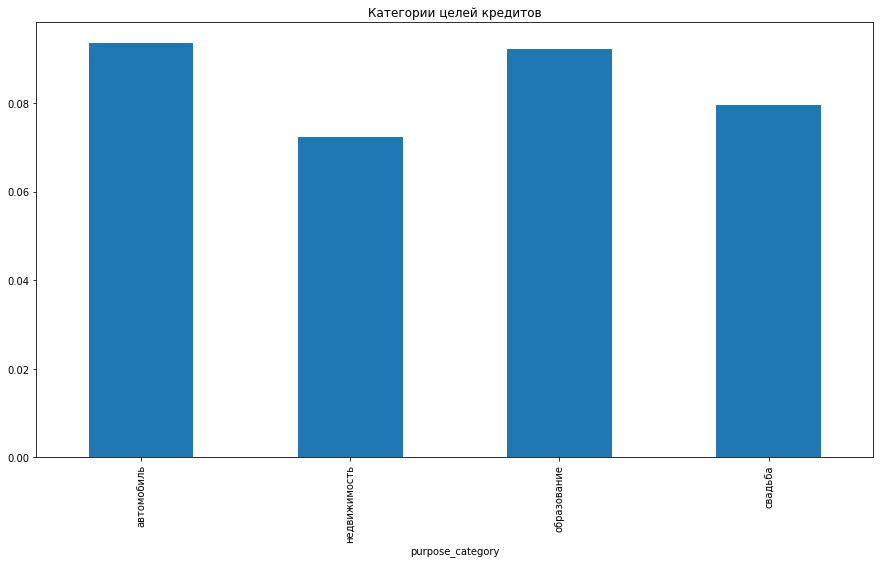

In [64]:
data_grouped_by_purpose_category['conversion'].plot(kind='bar', figsize=(15,8), 
                                                    title='Категории целей кредитов')

<div id='id-section49'/>

## [Шаг 4. Общий вывод](#id-section50)

Исследование позволило нам сформулировать, по каким критериям можно определить *самых надежных* заемщиков (то есть тех клиентов, которые взяли кредит и вовремя его погасили, редко допуская просрочки):
- у них нет детей,
- овдовевшие,
- с очень высоким уровнем дохода (больше 400 тыс.руб. в месяц), 
- берут кредит для проведения операций с недвижимостью или для организации свадьбы.


Заемщики, которые чаще допускают просрочки по выплате кредита, соответствуют таким критериям:
- у них 1 ребенок или 2 детей,
- не состоят в официальном браке,
- берут кредит на автомобиль или образование.